In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

%matplotlib inline

In [16]:
def loadtxt(file: Path) -> np.ndarray:
    if not file.exists():
        raise FileNotFoundError(f"File not found: {file}")
    return np.loadtxt(file)


def plot(ax: plt.Axes, root_dir: Path, case: str, wave: str) -> None:
    dir = root_dir / Path(case) / Path(wave)

    u0 = loadtxt(dir/Path("u0.txt"))
    u1 = loadtxt(dir/Path("u500.txt"))
    x = loadtxt(dir/Path("x.txt"))

    ax.plot(x, u0, 'k-', linewidth=0.5, label="t = 0.0 sec")
    ax.plot(x, u1, 'k.', label="t = 2.0 sec")
    ax.set_xlabel("x")
    ax.set_ylabel("u")
    ax.set_title(f"{case}")


def plot_wave(simulators: list[str], wave: str) -> None:
    fig = plt.figure(figsize=(12, 6))
    for i, simulator in enumerate(simulators, 1):
        ax = fig.add_subplot(2, 4, i)
        plot(ax, Path("result"), simulator, wave)
    fig.tight_layout()


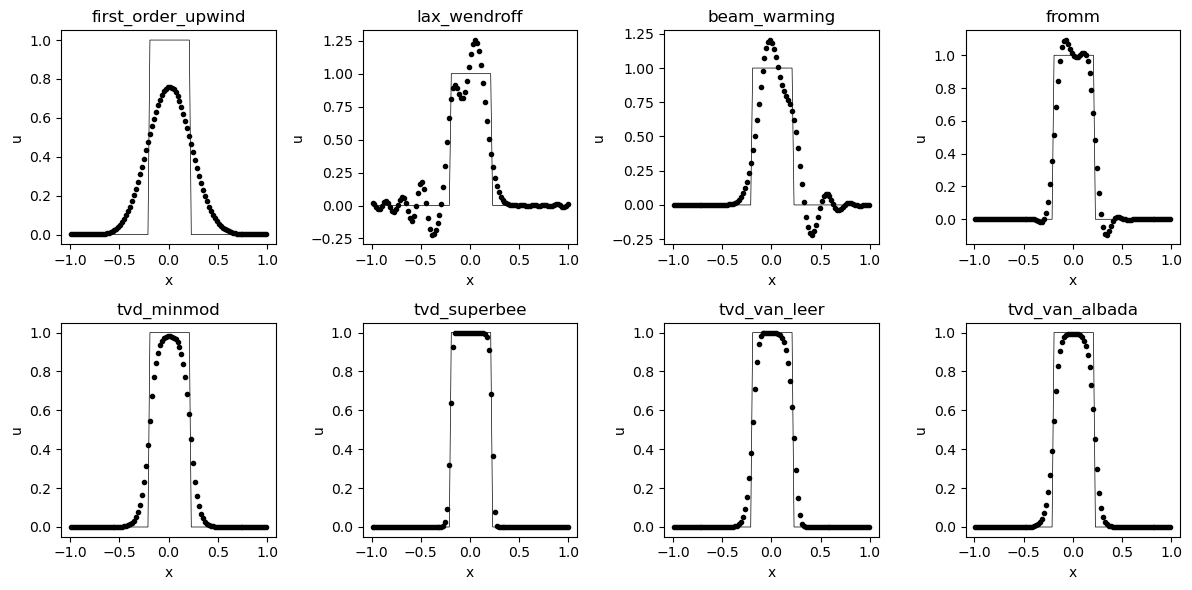

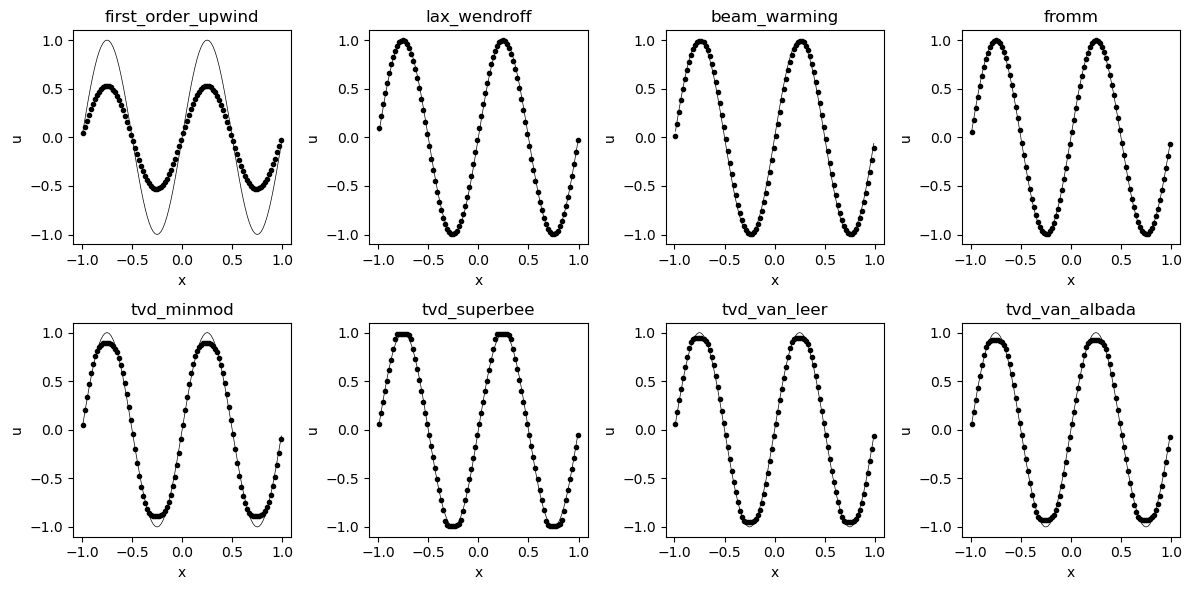

In [17]:
simulators = [
    "first_order_upwind",
    "lax_wendroff",
    "beam_warming",
    "fromm",
    "tvd_minmod",
    "tvd_superbee",
    "tvd_van_leer",
    "tvd_van_albada"
]

plot_wave(simulators, "pulse")
plot_wave(simulators, "sine")